# Perceptron

### Versão modificada, comentada e com análise de dados

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df = pd.read_csv('iris-dataset.csv', names=cols)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


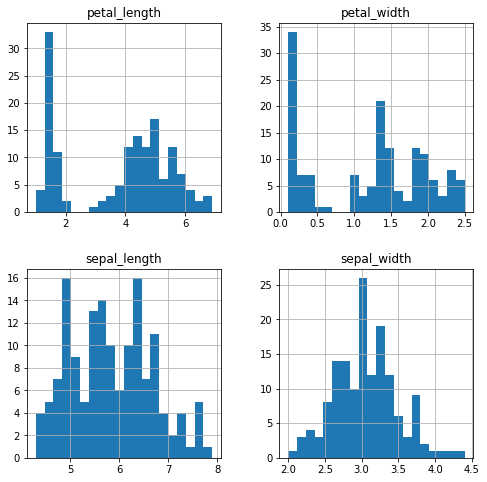

In [7]:
df.hist(bins=20, figsize=(8,8));

In [8]:
df.corr().style.set_precision(4)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.1094,0.8718,0.818
sepal_width,-0.1094,1,-0.4205,-0.3565
petal_length,0.8718,-0.4205,1,0.9628
petal_width,0.818,-0.3565,0.9628,1


In [9]:
# cmap: https://matplotlib.org/examples/color/colormaps_reference.html
df.corr().style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.11,0.87,0.82
sepal_width,-0.11,1,-0.42,-0.36
petal_length,0.87,-0.42,1,0.96
petal_width,0.82,-0.36,0.96,1


In [10]:
df['label'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: label, dtype: int64

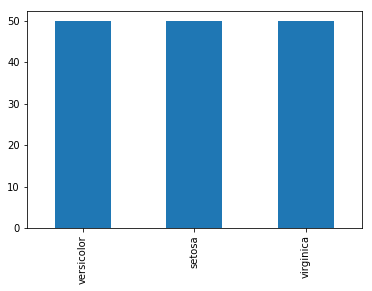

In [11]:
df['label'].value_counts().plot(kind='bar');

### Usando dados apenas das classes setosa e versicolor já que vamos fazer classificação binária

In [12]:
df = df[ (df['label'] == 'setosa') | (df['label'] == 'versicolor') ]

In [13]:
df['label'].value_counts()

versicolor    50
setosa        50
Name: label, dtype: int64

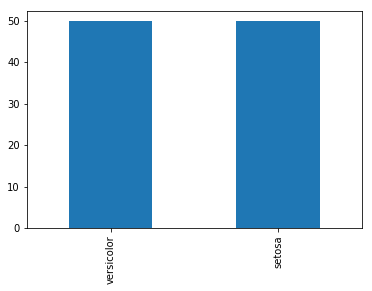

In [14]:
df['label'].value_counts().plot(kind='bar');

### Codificando labels para os valores 1 e -1, respectivamente para setosa e versicolor

In [15]:
df['label'] = np.where(df['label'] == 'setosa', 1, -1)

### Separação entre features (X) e label (y)

In [16]:
X = df.values[:, :-1]
y = df.values[:, -1]

### Randomização dos dados usando semente (seed)

In [24]:
rs = np.random.RandomState(1)
shuffled_indices = rs.permutation(X.shape[0])
shuffled_indices

array([80, 84, 33, 81, 93, 17, 36, 82, 69, 65, 92, 39, 56, 52, 51, 32, 31,
       44, 78, 10,  2, 73, 97, 62, 19, 35, 94, 27, 46, 38, 67, 99, 54, 95,
       88, 40, 48, 59, 23, 34, 86, 53, 77, 15, 83, 41, 45, 91, 26, 98, 43,
       55, 24,  4, 58, 49, 21, 87,  3, 74, 30, 66, 70, 42, 47, 89,  8, 60,
        0, 90, 57, 22, 61, 63,  7, 96, 13, 68, 85, 14, 29, 28, 11, 18, 20,
       50, 25,  6, 71, 76,  1, 16, 64, 79,  5, 75,  9, 72, 12, 37])

In [20]:
X = X[shuffled_indices]
y = y[shuffled_indices]

In [21]:
X[:5]

array([[5.5, 2.4, 3.8, 1.1],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 2.3, 3.3, 1. ]])

In [22]:
y[:5]

array([-1., -1.,  1., -1., -1.])

### Usando apenas 10 amostras do dataset para treino

In [21]:
n = 10
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]

### Calculando médias de matrizes e vetores somente para verificação/checagem

In [22]:
np.average(X_train), np.average(y_train) 

(3.1449999999999996, -0.4)

In [23]:
np.average(X_test), np.average(y_test) 

(3.0427777777777774, 0.044444444444444446)

### Criação, treino e avaliação de modelos usando a métrica acurácia

In [94]:
model = Perceptron(eta=0.00001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.8222222222222222

In [95]:
model.errors_

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1]

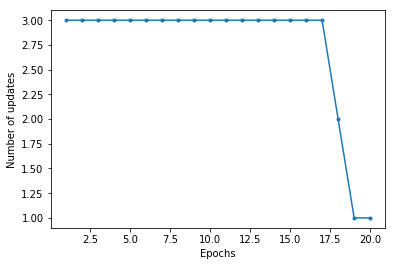

In [96]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

In [121]:
model = Perceptron(eta=0.003, n_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.9888888888888889

In [122]:
model.errors_

[4, 4, 3, 0, 0, 0, 0, 0, 0, 0]

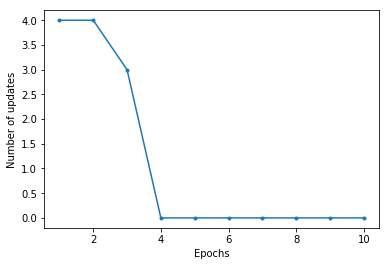

In [123]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');

In [137]:
model = Perceptron(eta=0.0001, n_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

1.0

In [138]:
model.errors_

[3, 3, 0, 0, 0, 0, 0, 0, 0, 0]

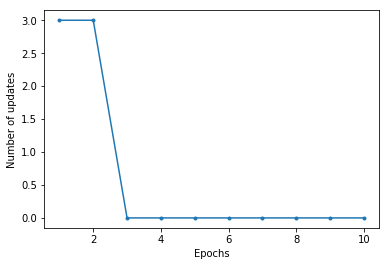

In [139]:
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of updates');